<a href="https://colab.research.google.com/github/IamLucifer0312/Furniture-Recognition-CNN/blob/henry-task-3/Task3_classify_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import gdown

# Google Drive file ID (from the shared link)
file_id = "1h2SIWZZUESO6xygzF4iMkK-tVc4mZ27M"
file_name = "Furniture_Data.zip"
file_path = "/content/" + file_name

# Download the file
gdown.download(f"https://drive.google.com/uc?id={file_id}", file_name, quiet=False)
print(f"Downloaded: {file_path}")

Downloading...
From (original): https://drive.google.com/uc?id=1h2SIWZZUESO6xygzF4iMkK-tVc4mZ27M
From (redirected): https://drive.google.com/uc?id=1h2SIWZZUESO6xygzF4iMkK-tVc4mZ27M&confirm=t&uuid=5ccf10dc-ace7-42df-8e6e-61fb84e24876
To: /content/Furniture_Data.zip
100%|██████████| 2.49G/2.49G [00:37<00:00, 66.1MB/s]

Downloaded: /content/Furniture_Data.zip


In [3]:
!unzip -q $file_path -d /content/extracted_folder

In [4]:
import os
import shutil

source_dir = "/content/extracted_folder/Furniture_Data"
target_dir = "/content/Task3_Data"


if not os.path.exists(target_dir):
    os.makedirs(target_dir)

for furniture_type in os.listdir(source_dir):
    furniture_path = os.path.join(source_dir, furniture_type)

    if not os.path.isdir(furniture_path):
        continue

    for style in os.listdir(furniture_path):
        style_path = os.path.join(furniture_path, style)

        if not os.path.isdir(style_path):
            continue

        target_style_path = os.path.join(target_dir, style)
        if not os.path.exists(target_style_path):
            os.makedirs(target_style_path)

        for img in os.listdir(style_path):
            img_path = os.path.join(style_path, img)

            if not os.path.isfile(img_path):
                continue

            shutil.move(img_path, target_style_path)

print("Success join all same furrniture type into 1 folder.")

Success join all same furrniture type into 1 folder.


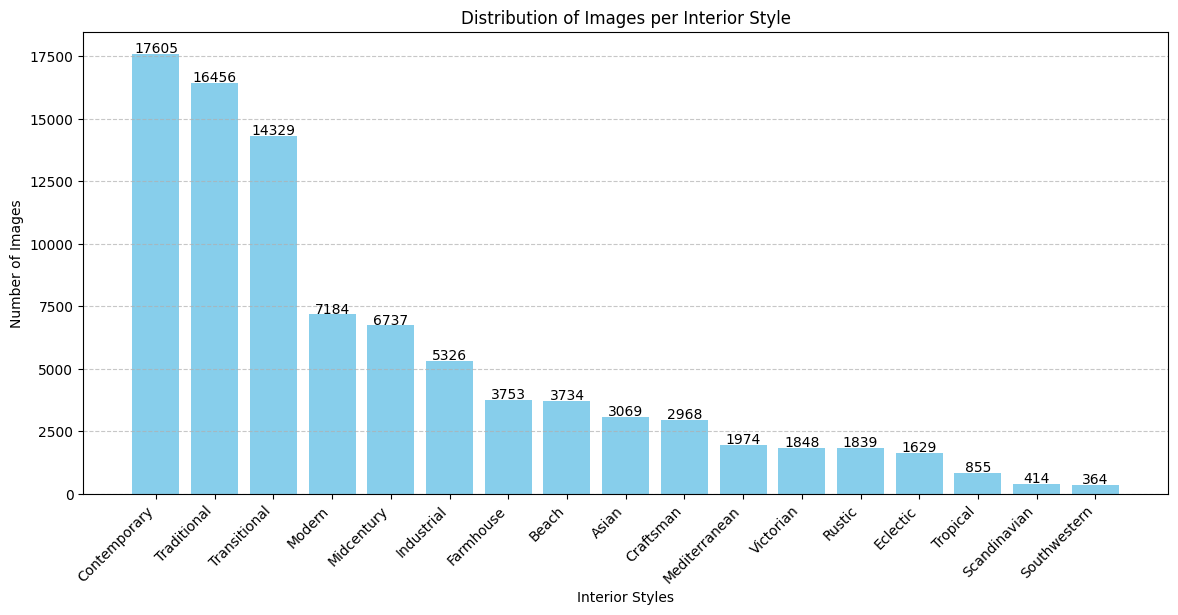

In [5]:
import os
import matplotlib.pyplot as plt

data_dir = "/content/Task3_Data"

style_counts = {}
for style in os.listdir(data_dir):
    if style.startswith("."):
        continue
    style_path = os.path.join(data_dir, style)
    if os.path.isdir(style_path):
        style_counts[style] = len(os.listdir(style_path))

style_counts = dict(sorted(style_counts.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(14, 6))
plt.bar(style_counts.keys(), style_counts.values(), color='skyblue')
plt.xlabel("Interior Styles")
plt.ylabel("Number of Images")
plt.title("Distribution of Images per Interior Style")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(style_counts.values()):
    plt.text(i, v + 50, str(v), ha='center', fontsize=10)

plt.show()

In [6]:
import os
import hashlib
from PIL import Image

data_dir = "/content/Task3_Data"

hashes = set()
deleted_count = 0

def calculate_hash(image_path):
    try:
        with open(image_path, "rb") as f:
            return hashlib.sha256(f.read()).hexdigest()
    except Exception as e:
        print(f"Error when reading {image_path}: {e}")
        return None

for style in os.listdir(data_dir):
    style_path = os.path.join(data_dir, style)

    if not os.path.isdir(style_path):
        continue

    for img in os.listdir(style_path):
        img_path = os.path.join(style_path, img)
        try:
            with Image.open(img_path) as im:
                im.verify()
        except:
            print(f"Not valid image: {img_path}")
            continue

        img_hash = calculate_hash(img_path)
        if img_hash is None:
            continue

        if img_hash in hashes:
            os.remove(img_path)
            deleted_count += 1
            print(f"Deleted image: {img_path}")
        else:
            hashes.add(img_hash)

print(f"\n= Successfully deleted {deleted_count} duplicated image.")

Deleted image: /content/Task3_Data/Traditional/14823traditional-table-lamps.jpg
Deleted image: /content/Task3_Data/Traditional/10192traditional-table-lamps.jpg
Deleted image: /content/Task3_Data/Traditional/14767traditional-table-lamps.jpg
Deleted image: /content/Task3_Data/Traditional/17441traditional-table-lamps.jpg
Deleted image: /content/Task3_Data/Traditional/15655traditional-table-lamps.jpg
Deleted image: /content/Task3_Data/Traditional/29101traditional-table-lamps.jpg
Deleted image: /content/Task3_Data/Traditional/5564traditional-table-lamps.jpg
Deleted image: /content/Task3_Data/Traditional/29128traditional-desk-lamps.jpg
Deleted image: /content/Task3_Data/Traditional/17368traditional-table-lamps.jpg
Deleted image: /content/Task3_Data/Traditional/12604traditional-table-lamps.jpg
Deleted image: /content/Task3_Data/Traditional/13712traditional-table-lamps.jpg
Deleted image: /content/Task3_Data/Traditional/20881traditional-table-lamps.jpg
Deleted image: /content/Task3_Data/Traditi

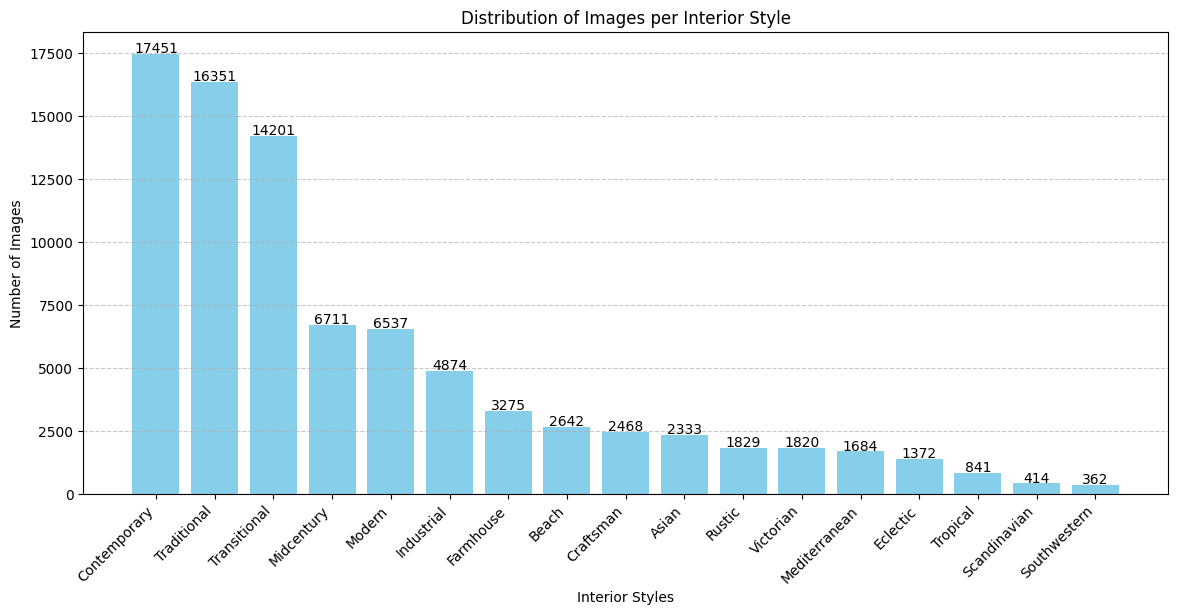

In [7]:
import os
import matplotlib.pyplot as plt

data_dir = "/content/Task3_Data"

style_counts = {}
for style in os.listdir(data_dir):
    if style.startswith("."):
        continue
    style_path = os.path.join(data_dir, style)
    if os.path.isdir(style_path):
        style_counts[style] = len(os.listdir(style_path))

style_counts = dict(sorted(style_counts.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(14, 6))
plt.bar(style_counts.keys(), style_counts.values(), color='skyblue')
plt.xlabel("Interior Styles")
plt.ylabel("Number of Images")
plt.title("Distribution of Images per Interior Style")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(style_counts.values()):
    plt.text(i, v + 50, str(v), ha='center', fontsize=10)

plt.show()

In [8]:
import os
import shutil
import random
import numpy as np
from PIL import Image, ImageEnhance

data_dir = "/content/Task3_Data"
output_dir = "/content/Split_Dataset"

train_dir = os.path.join(output_dir, "train")
val_dir = os.path.join(output_dir, "val")
test_dir = os.path.join(output_dir, "test")

for folder in [train_dir, val_dir, test_dir]:
    os.makedirs(folder, exist_ok=True)

split_ratios = {"train": 0.7, "val": 0.15, "test": 0.15}

style_counts = {}
for style in os.listdir(data_dir):
    style_path = os.path.join(data_dir, style)
    if not os.path.isdir(style_path):
        continue
    images = os.listdir(style_path)
    random.shuffle(images)

    num_images = len(images)
    num_train = int(num_images * split_ratios["train"])
    num_val = int(num_images * split_ratios["val"])

    style_counts[style] = num_images

    for i, img in enumerate(images):
        src_path = os.path.join(style_path, img)
        if i < num_train:
            dest_folder = os.path.join(train_dir, style)
        elif i < num_train + num_val:
            dest_folder = os.path.join(val_dir, style)
        else:
            dest_folder = os.path.join(test_dir, style)

        os.makedirs(dest_folder, exist_ok=True)
        shutil.copy(src_path, dest_folder)

print("\n Success split dataset!")


 Success split dataset!


In [9]:
import os
import random
import shutil
import numpy as np

train_dir = "/content/Split_Dataset/train"

style_counts = {style: len(os.listdir(os.path.join(train_dir, style)))
                for style in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, style))}

average_count = int(np.mean(list(style_counts.values())))
print(f"\n Average image in each style: {average_count}")

for style, count in style_counts.items():
    if count < average_count:
        style_train_dir = os.path.join(train_dir, style)
        image_paths = [os.path.join(style_train_dir, img) for img in os.listdir(style_train_dir)]

        while len(os.listdir(style_train_dir)) < average_count:
            img_path = random.choice(image_paths)
            new_img_path = os.path.join(style_train_dir, f"dup_{len(os.listdir(style_train_dir))}_{os.path.basename(img_path)}")
            shutil.copy(img_path, new_img_path)

print("\n✅ Successfully duplicate image!")


 Average image in each style: 3506

✅ Successfully duplicate image!


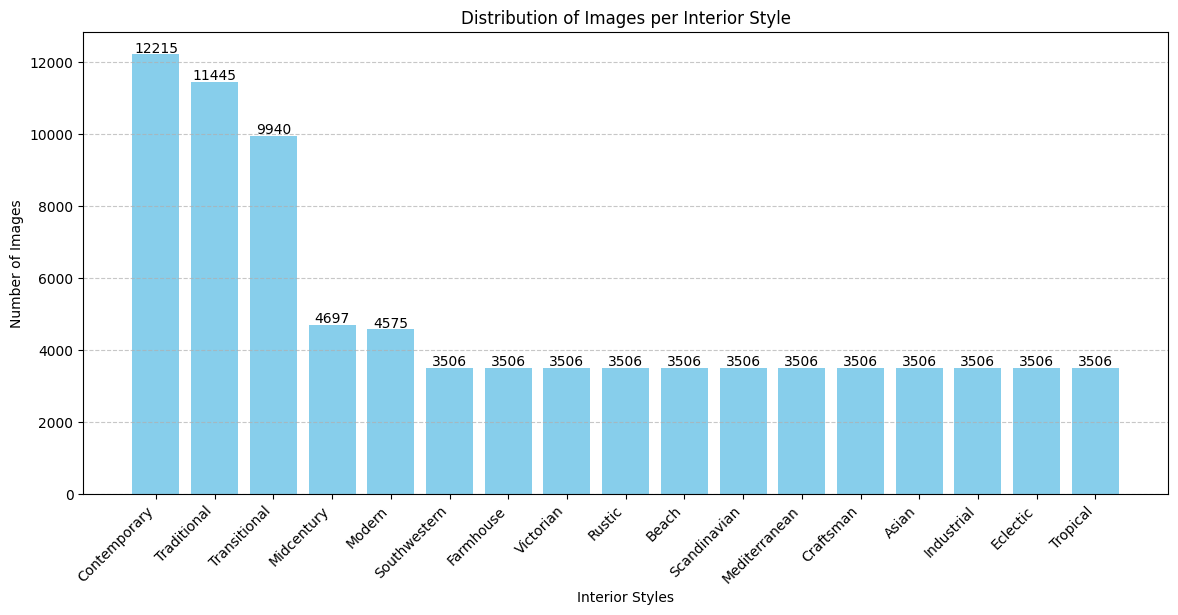

In [10]:
import os
import matplotlib.pyplot as plt

data_dir = "/content/Split_Dataset/train"

style_counts = {}
for style in os.listdir(data_dir):
    if style.startswith("."):
        continue
    style_path = os.path.join(data_dir, style)
    if os.path.isdir(style_path):
        style_counts[style] = len(os.listdir(style_path))

style_counts = dict(sorted(style_counts.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(14, 6))
plt.bar(style_counts.keys(), style_counts.values(), color='skyblue')
plt.xlabel("Interior Styles")
plt.ylabel("Number of Images")
plt.title("Distribution of Images per Interior Style")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(style_counts.values()):
    plt.text(i, v + 50, str(v), ha='center', fontsize=10)

plt.show()

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define augmentation parameters
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values to [0, 1]
    rotation_range=15,  # Rotate images by ±15 degrees
    width_shift_range=0.1,  # Shift images horizontally by up to 10%
    height_shift_range=0.1,  # Shift images vertically by up to 10%
    shear_range=0.1,  # Shear images by up to 10%
    zoom_range=0.1,  # Zoom in/out by up to 10%
    horizontal_flip=True,  # Flip images horizontally
    brightness_range=[0.8, 1.2],  # Adjust brightness
    fill_mode='nearest'  # Fill missing pixels after transformations
)

# Load dataset with augmentation
train_generator = train_datagen.flow_from_directory(
    directory='/content/Split_Dataset/train',
    target_size=(224, 224),  # Resize images to 224x224
    batch_size=16,
    class_mode='categorical'  # Use 'binary' for binary classification
)


# For validation and test sets, use only rescaling (no augmentation)
val_test_datagen = ImageDataGenerator(rescale=1.0/255.0)

val_generator = val_test_datagen.flow_from_directory(
    directory='/content/Split_Dataset/val',
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    directory='/content/Split_Dataset/test',
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical'
)

abc = train_generator.class_indices

print("Class indices of train:", train_generator.class_indices)
print("Class indices of val:", val_generator.class_indices)
print("Class indices of test:", test_generator.class_indices)

Found 84943 images belonging to 17 classes.
Found 12767 images belonging to 17 classes.
Found 12791 images belonging to 17 classes.
Class indices of train: {'Asian': 0, 'Beach': 1, 'Contemporary': 2, 'Craftsman': 3, 'Eclectic': 4, 'Farmhouse': 5, 'Industrial': 6, 'Mediterranean': 7, 'Midcentury': 8, 'Modern': 9, 'Rustic': 10, 'Scandinavian': 11, 'Southwestern': 12, 'Traditional': 13, 'Transitional': 14, 'Tropical': 15, 'Victorian': 16}
Class indices of val: {'Asian': 0, 'Beach': 1, 'Contemporary': 2, 'Craftsman': 3, 'Eclectic': 4, 'Farmhouse': 5, 'Industrial': 6, 'Mediterranean': 7, 'Midcentury': 8, 'Modern': 9, 'Rustic': 10, 'Scandinavian': 11, 'Southwestern': 12, 'Traditional': 13, 'Transitional': 14, 'Tropical': 15, 'Victorian': 16}
Class indices of test: {'Asian': 0, 'Beach': 1, 'Contemporary': 2, 'Craftsman': 3, 'Eclectic': 4, 'Farmhouse': 5, 'Industrial': 6, 'Mediterranean': 7, 'Midcentury': 8, 'Modern': 9, 'Rustic': 10, 'Scandinavian': 11, 'Southwestern': 12, 'Traditional': 13, 

In [12]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

image_counts = {
    "Contemporary": 12215, "Traditional": 11445, "Transitional": 9940,
    "Midcentury": 4697, "Modern": 4575, "Southwestern": 3506,
    "Farmhouse": 3506, "Victorian": 3506, "Rustic": 3506,
    "Beach": 3506, "Scandinavian": 3506, "Mediterranean": 3506,
    "Craftsman": 3506, "Asian": 3506, "Industrial": 3506,
    "Eclectic": 3506, "Tropical": 3506
}

sorted_image_counts = np.array([image_counts[class_name] for class_name in abc.keys()])

class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.arange(len(abc)),
    y=np.concatenate([[i] * count for i, count in enumerate(sorted_image_counts)])
)

class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}

print(abc, ": ",class_weight_dict)


{'Asian': 0, 'Beach': 1, 'Contemporary': 2, 'Craftsman': 3, 'Eclectic': 4, 'Farmhouse': 5, 'Industrial': 6, 'Mediterranean': 7, 'Midcentury': 8, 'Modern': 9, 'Rustic': 10, 'Scandinavian': 11, 'Southwestern': 12, 'Traditional': 13, 'Transitional': 14, 'Tropical': 15, 'Victorian': 16} :  {0: 1.425187074259253, 1: 1.425187074259253, 2: 0.4090631094844815, 3: 1.425187074259253, 4: 1.425187074259253, 5: 1.425187074259253, 6: 1.425187074259253, 7: 1.425187074259253, 8: 1.0638079374819973, 9: 1.0921761491481838, 10: 1.425187074259253, 11: 1.425187074259253, 12: 1.425187074259253, 13: 0.43658417495438545, 14: 0.5026867084862113, 15: 1.425187074259253, 16: 1.425187074259253}


In [13]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.7 MB/s eta 0:00:00


In [1]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define the model-building function
def build_model(hp):
    model = Sequential()

    # Convolutional layers with tunable filter size
    model.add(Conv2D(
        filters=hp.Int('conv1_filters', min_value=32, max_value=128, step=32),
        kernel_size=(3,3), activation='relu', padding='same', input_shape=(224, 224, 3)
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(
        filters=hp.Int('conv2_filters', min_value=64, max_value=256, step=64),
        kernel_size=(3,3), activation='relu', padding='same'
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(
        filters=hp.Int('conv3_filters', min_value=128, max_value=512, step=128),
        kernel_size=(3,3), activation='relu', padding='same'
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # model.add(Conv2D(
    #     filters=hp.Int('conv4_filters', min_value=256, max_value=512, step=256),
    #     kernel_size=(3,3), activation='relu', padding='same'))
    # model.add(BatchNormalization())
    # model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    # Fully connected layers with tunable units
    model.add(Dense(
        units=hp.Int('dense1_units', min_value=128, max_value=1024, step=128),
        activation='relu'
    ))
    model.add(Dropout(hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(Dense(17, activation='softmax'))

    # Compile the model with tunable learning rate
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_accuracy', patience=5, restore_best_weights=True
)

# Define the tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=15,
    factor=3,
    directory='kt_hyperband',
    project_name='furniture_tuning'
)

# Display the search space
tuner.search_space_summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Search space summary
Default search space size: 6
conv1_filters (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': 'linear'}
conv2_filters (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 256, 'step': 64, 'sampling': 'linear'}
conv3_filters (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 512, 'step': 128, 'sampling': 'linear'}
dense1_units (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 1024, 'step': 128, 'sampling': 'linear'}
dropout_rate (Float)
{'default': 0.2, 'conditions': [], 'min_value': 0.2, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.001, 'conditions': [], 'values': [0.001, 0.0005, 0.0001], 'ordered': True}


In [ ]:
# Run the hyperparameter search
tuner.search(
    train_generator,  # Training dataset
    validation_data=val_generator,  # Validation dataset
    epochs=10,
    callbacks=[early_stopping]
)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparam eters: {best_hps.values}")

Trial 2 Complete [00h 00m 19s]

Best val_accuracy So Far: None
Total elapsed time: 00h 02m 02s

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
64                |32                |conv1_filters
256               |192               |conv2_filters
512               |512               |conv3_filters
768               |768               |dense1_units
0.2               |0.2               |dropout_rate
0.0005            |0.001             |learning_rate
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/tuners/hyperband.py", line 427, in run_trial
    return super().run_trial(trial, *fit_args, **fit_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ke

RuntimeError: Number of consecutive failures exceeded the limit of 3.
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/tuners/hyperband.py", line 427, in run_trial
    return super().run_trial(trial, *fit_args, **fit_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/hypermodel.py", line 149, in fit
    return model.fit(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/eager/execute.py", line 59, in quick_execute
    except TypeError as e:
tensorflow.python.framework.errors_impl.UnknownError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-17-a0e132f94a70>", line 2, in <cell line: 0>

  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/base_tuner.py", line 234, in search

  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/base_tuner.py", line 274, in _try_run_and_update_trial

  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/base_tuner.py", line 239, in _run_and_update_trial

  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/tuners/hyperband.py", line 427, in run_trial

  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial

  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/tuner.py", line 233, in _build_and_fit_model

  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/hypermodel.py", line 149, in fit

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator

Failed to determine best cudnn convolution algorithm for:
%cudnn-conv-bias-activation.10 = (f32[256,256,112,112]{3,2,1,0}, u8[0]{0}) custom-call(f32[256,64,112,112]{3,2,1,0} %reduce-window.3, f32[256,64,3,3]{3,2,1,0} %bitcast.4399, f32[256]{0} %arg9.10), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_1/conv2d_1_2/convolution" source_file="/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/ops.py" source_line=1196}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}

Original error: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 3305111552 bytes.

To ignore this failure and try to use a fallback algorithm (which may have suboptimal performance), use XLA_FLAGS=--xla_gpu_strict_conv_algorithm_picker=false.  Please also file a bug for the root cause of failing autotuning.
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_multi_step_on_iterator_10599]


In [2]:
from keras_tuner import HyperParameters

# Manually define the best hyperparameters
best_hps = HyperParameters()
best_hps.Fixed('conv1_filters', 64)
best_hps.Fixed('conv2_filters', 128)
best_hps.Fixed('conv3_filters', 256)
best_hps.Fixed('dense1_units', 512)
best_hps.Fixed('dropout_rate', 0.2)
best_hps.Fixed('learning_rate', 0.0005)

0.0005

In [3]:
# Build and train the best model
best_model = tuner.hypermodel.build(best_hps)
best_model.fit(train_generator, validation_data=val_generator, epochs=15, class_weight=class_weight_dict)

# Save the best model
best_model.save("classification_style_model.h5")

NameError: name 'train_generator' is not defined

In [ ]:
from tensorflow import keras

best_model.save("classification_style_model.keras")

In [ ]:
best_model.evaluate(test_generator)

800/800 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.2055 - loss: 2.4821


[2.4888851642608643, 0.2047533392906189]